In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as sp
import random as r
import pickle

In [3]:
from pcalg import estimate_cpdag, estimate_skeleton

In [4]:
#Conditional Independet Test Binary/Discrete
from gsq.ci_tests import ci_test_bin, ci_test_dis

In [5]:
from pygobnilp.gobnilp import Gobnilp, from_bnlearn_modelstring 
from pygobnilp.gobnilp import from_bnlearn_modelstring

In [5]:
#convert dataframe as matrix
df = pd.read_pickle('data_demo.pkl')

In [6]:
df

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

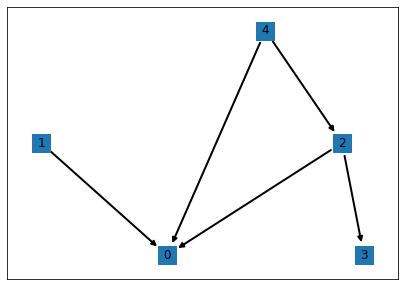

In [17]:
adj = pd.read_pickle('adj.pkl')
D = nx.DiGraph(adj, directed=True)
pos = nx.drawing.nx_agraph.graphviz_layout(D, prog='dot')
options = {
    'node_size': 350,
    'node_shape': 's',
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(D, pos, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

# PC algorithm 

## Making skeleton

In [9]:
(pred_skel, sep_set) = estimate_skeleton(indep_test_func=ci_test_bin, data_matrix=df, alpha=0.01)

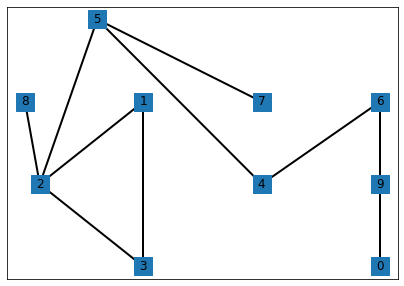

In [10]:
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(pred_skel, pos, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

## Adding Orientations

In [11]:
pred_DAG = estimate_cpdag(skel_graph=pred_skel, sep_set=sep_set)

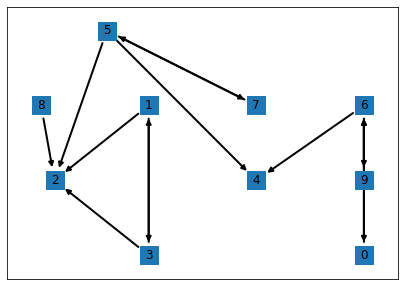

In [12]:
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(pred_DAG, pos, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

# ILP Methods

In [22]:
 len(df[0])

10

In [13]:
number_cat = 2
A = np.array([np.array(list(range(0,  len(df[0])))), np.repeat(number_cat,  len(df[0]))])
new = np.vstack([A, df ])
np.savetxt('m_thetha.dat', new, delimiter=' ',fmt='%s')

In [32]:
m = Gobnilp()

Changed value of parameter PreCrush to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter CutPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter GomoryPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter ZeroHalfCuts to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPGapAbs to 0.0
   Prev: 1e-10  Min: 0.0  Max: inf  Default: 1e-10


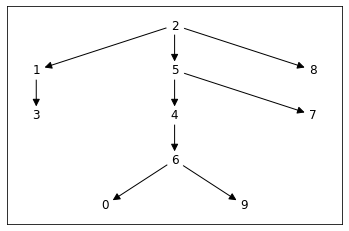

In [34]:
m.learn('m_thetha.dat', palim= 3)

## Plotting

In [28]:
string = m.learned_bn.bnlearn_modelstring()
ilp_pred = from_bnlearn_modelstring(string) #
lista_pred = list(ilp_pred)
lista_pred.sort(key=int)
mapping = dict(zip(lista_pred, range(0, len(df[0]))))
ilp_pred = nx.relabel_nodes(ilp_pred, mapping)

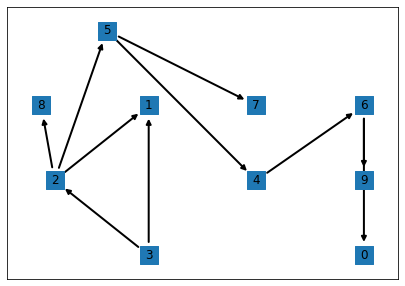

In [29]:
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(ilp_pred, pos, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

# With Discrete Data

## ILP Methods

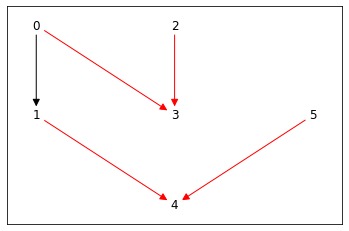

In [118]:
m = Gobnilp()
m.learn('m_thetha.dat',palim=3)

In [121]:
string = m.learned_bn.bnlearn_modelstring()
ilp_pred = from_bnlearn_modelstring(string) #
lista_pred = list(ilp_pred)
lista_pred.sort(key=int)
mapping = dict(zip(lista_pred, range(0, len(data_matrix[0]))))
ilp_pred = nx.relabel_nodes(ilp_pred, mapping)

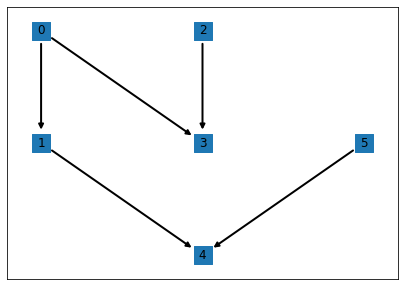

In [122]:
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(ilp_pred, pos, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

## PC-algo

In [109]:
#x = np.fromfile("m_thetha_t.dat", dtype=dat)
data_matrix = np.loadtxt( 'm_thetha_t.dat' ).astype(int)

In [110]:
data_matrix

array([[1, 2, 1, 0, 1, 1],
       [1, 0, 2, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 1, 0, 1, 2, 1],
       [0, 2, 1, 2, 2, 0],
       [0, 0, 0, 0, 1, 1]])

In [111]:
(pred_skel, sep_set) = estimate_skeleton(indep_test_func=ci_test_dis, data_matrix=data_matrix, alpha=0.01)

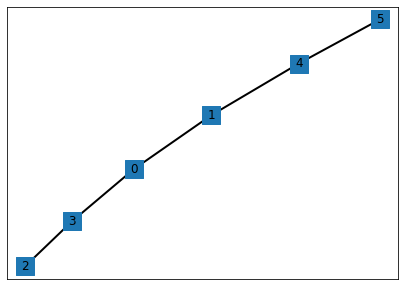

In [115]:
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(pred_skel, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()

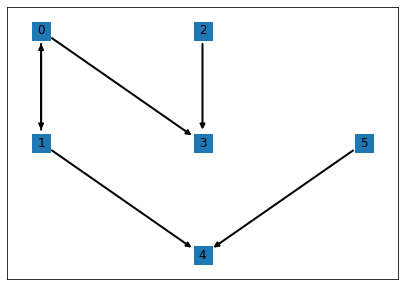

In [124]:
pred_DAG = estimate_cpdag(skel_graph=pred_skel, sep_set=sep_set)
pos = nx.drawing.nx_agraph.graphviz_layout(pred_DAG, prog='dot')
plt.figure(num=None,  figsize=(7, 5))
nx.draw_networkx(pred_DAG,pos, arrows=True, vmin=0, vmax= .5,  cmap=plt.cm.get_cmap('RdBu_r'), **options)
plt.show()